# Quantum Bit string Comparator

El porpósito de este cirtuito es comparar dos estados cuánticos y verificar si son iguales o no. Este qbsc permite tener el modelo de estructura condicional que es crucial en el disñeo de algoritmos.


https://www.researchgate.net/publication/228574906_Quantum_bit_string_comparator_Circuits_and_applications

# Mid Point  Quantum Comparator

In [41]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

C:\Users\jefai\AppData\Local\Temp\ipykernel_17800\2650430601.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [42]:
from qiskit import *
import qiskit.visualization as visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()

In [43]:
backend = Aer.get_backend('statevector_simulator')

In [44]:
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [45]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [46]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(circ, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

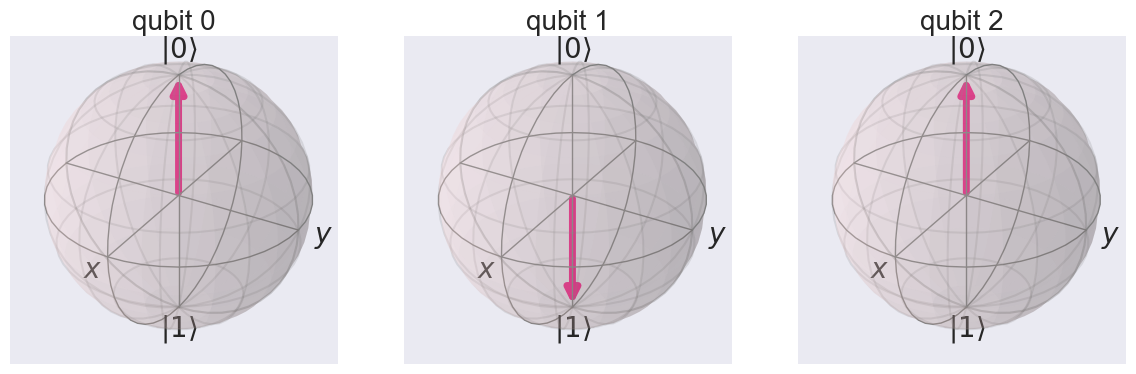

In [47]:
qr = QuantumRegister(3)
qc = ClassicalRegister(3)
circ = QuantumCircuit(qr, qc)
initializedState = stateGenerator('010')
circ.initialize(initializedState, qr)
getBloch(circ)

In [48]:
circ.csx(1, 2)
circ.cx(0, 1)
circ.crx(-np.pi/2, 0, 2)
circ.csx(1, 2)
circ.cx(0, 1)
circ.i(2)

for i in range(0, 3):
    circ.measure(i, i)

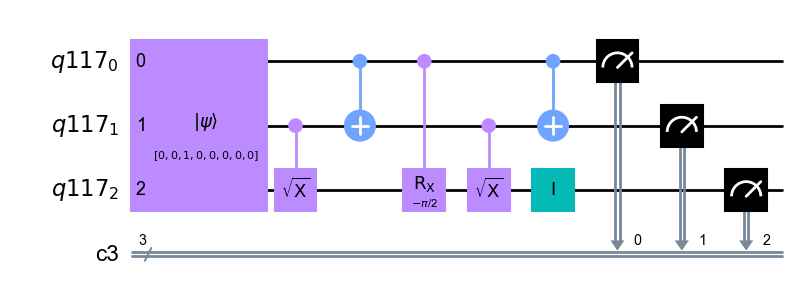

In [49]:
circ.draw('mpl')

['110']


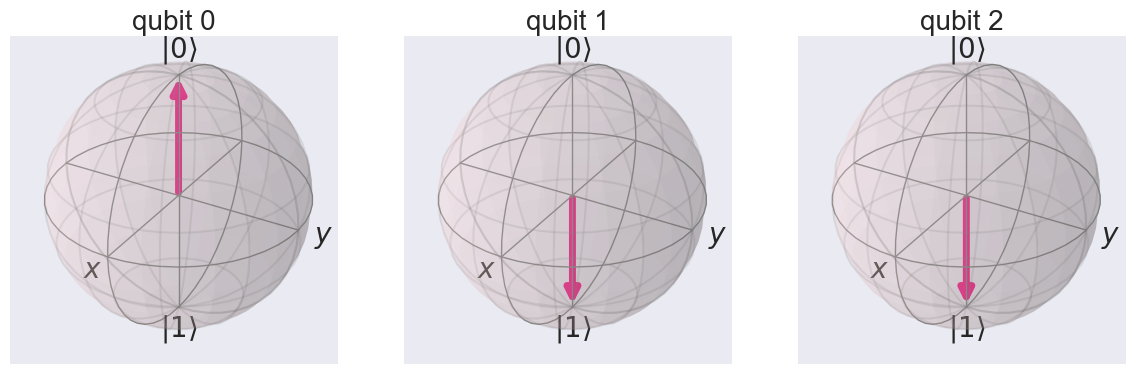

In [50]:
print(getMeasure(circ, 1))
getBloch(circ)

In [51]:
circ = QuantumCircuit(qr)
circ.csx(1, 2)
circ.cx(0, 1)
circ.crx(-np.pi/2, 0, 2)
circ.csx(1, 2)
circ.cx(0, 1)

In [52]:
qbsc = circ.to_gate(label=' QBSC')

In [53]:
circ2 = QuantumCircuit(7)
circ2.append(qbsc, [0, 1, 2])

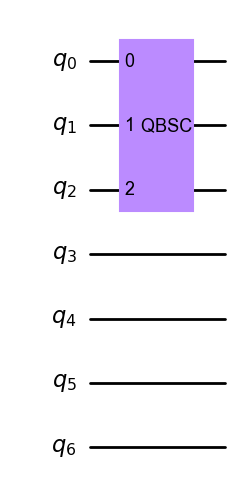

In [54]:
circ2.draw('mpl')

In [55]:
midcirc = QuantumCircuit(4)

#less than greater than
midcirc.cx(0, 2)
midcirc.crx(-np.pi/2, 2, 3)
midcirc.cx(1, 2)
midcirc.csx(1, 3)
midcirc.csx(2, 3)
midcirc.cx(3, 2)

#equal
midcirc.x(0)
midcirc.cx(0, 1)

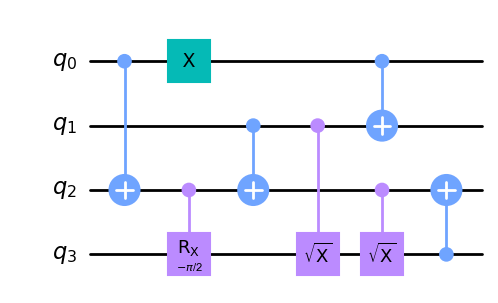

In [56]:
midcirc.draw('mpl')